# Models at a wind state

In [1]:
%load_ext kedro.extras.extensions.ipython
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%config Completer.use_jedi = False

[12/21/23 17:03:13] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/extras ]8;id=590675;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=252253;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             /extensions/ipython.py:19: KedroDeprecationWarning:                                   
                             kedro.extras.extensions.ipython should be accessed only using the                     
                             alias kedro.ipython. The unaliased name will be removed in Kedro                      
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Resolved project path as: /home/maa/dev/PHD.                           ]8;id=355404;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=170163;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/framew ]8;id=798158;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=546370;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             ork/startup.py:99: KedroDeprecationWarning: project_version in                        
                             pyproject.toml is deprecated, use kedro_init_version instead                          
                               warnings.warn(                                                                      
                                                                                                                   

[12/21/23 17:03:25] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/io/par ]8;id=533357;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=710113;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             titioned_dataset.py:200: KedroDeprecationWarning: 'PartitionedDataset'                
                             has been moved to `kedro-datasets` and will be removed in Kedro                       
                             0.19.0.                                                                               
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project phd                                                      ]8;id=447038;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=81677;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=311817;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=740664;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=832370;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=757554;file:///home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [15]:
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
import numpy as np
import yaml

from vessel_manoeuvring_models.visualization.plot import track_plot, plot
from phd.visualization.plot_ship import track_plots
import sympy as sp
from functools import reduce
from operator import add
from vessel_manoeuvring_models.symbols import *
import vessel_manoeuvring_models.symbols as symbols
from IPython.display import display
from vessel_manoeuvring_models.prime_system import df_prime
from vessel_manoeuvring_models.substitute_dynamic_symbols import run, lambdify, get_function_subs

from vessel_manoeuvring_models.parameters import df_parameters
from phd.helpers import mean
from vessel_manoeuvring_models.angles import mean_angle
from vessel_manoeuvring_models.angles import smallest_signed_angle
from vessel_manoeuvring_models.models.diff_eq_to_matrix import DiffEqToMatrix
from vessel_manoeuvring_models import prime_system
from vessel_manoeuvring_models.models.modular_simulator import subs_simpler
import statsmodels.api as sm
from vct.bokeh_plotting import create_tab
from phd.visualization.plot_prediction import plot_total_force, plot_force_components, predict
from sklearn.metrics import r2_score, mean_absolute_error
from phd.pipelines.resimulate_with_autopilot.nodes import find_initial_equilibrium_rev
from vessel_manoeuvring_models.prime_system import PrimeSystem
from numpy.testing import assert_almost_equal

import inspect
from sympy.printing import pretty
p = df_parameters["symbol"]

import logging
log = logging.getLogger()
handler = log.handlers[0]
handler.setLevel(logging.ERROR)  # Remove info 

import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,10)


from vct.bokeh_plotting import create_tab
import optimize_delta

import yaml

with open('../styles.yml', 'r') as file:
    styles = yaml.safe_load(file)

[autoreload of fsspec.spec failed: Traceback (most recent call last):
  File "/home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: can't apply this __setattr__ to _Cached object
]
[autoreload of fsspec.implementations.local failed: Traceback

In [3]:
#%reload_kedro
ship='wPCC'
ship_data = catalog.load(f"{ship}.ship_data")
models_ID_hull = catalog.load(f"{ship}.models_ID_hull")
models_ID_hull_rudder = catalog.load(f"{ship}.models_ID_hull_rudder")
models_VCT_MDL = catalog.load(f"{ship}.models_VCT_MDL")

In [4]:
models = {
    'VCT' : models_VCT_MDL['semiempirical_covered'](),
    'ID hull' : models_ID_hull['semiempirical_covered'](),
    'ID hull rudder' : models_ID_hull_rudder['Abkowitz'](),
}


In [5]:
model = models['VCT']

In [6]:
for name, subsytem in model.subsystems.items():
    try:
        subsytem.ship
    except:
        raise ValueError(name)

In [7]:
model.show_subsystems()

hull: PrimeEquationSubSystem
propellers: PropellersSimpleSystem
rudder_port: SemiempiricalRudderSystemCovered
rudder_stbd: SemiempiricalRudderSystemCovered
rudders: Rudders
rudder_hull_interaction: RudderHullInteractionSystem
wind_force: DummyWindForceSystem


In [8]:
N = 10
data = pd.DataFrame(index=np.arange(N))
data[model.states_str] = 0
data[model.control_keys] = 0
data['beta'] = np.deg2rad(np.linspace(-20,20,N))
data['V'] = 0.8
data['u'] = data['V']*np.cos(data['beta'])
data['v'] = -data['V']*np.sin(data['beta'])
data['thrust_port'] = 5
data['thrust_stbd'] = 5
data['thrust'] = data['thrust_port'] + data['thrust_stbd']

In [16]:
dataframes={}
for name, model_ in models.items():
    dataframes[name] = predict(model=model_, data=data)

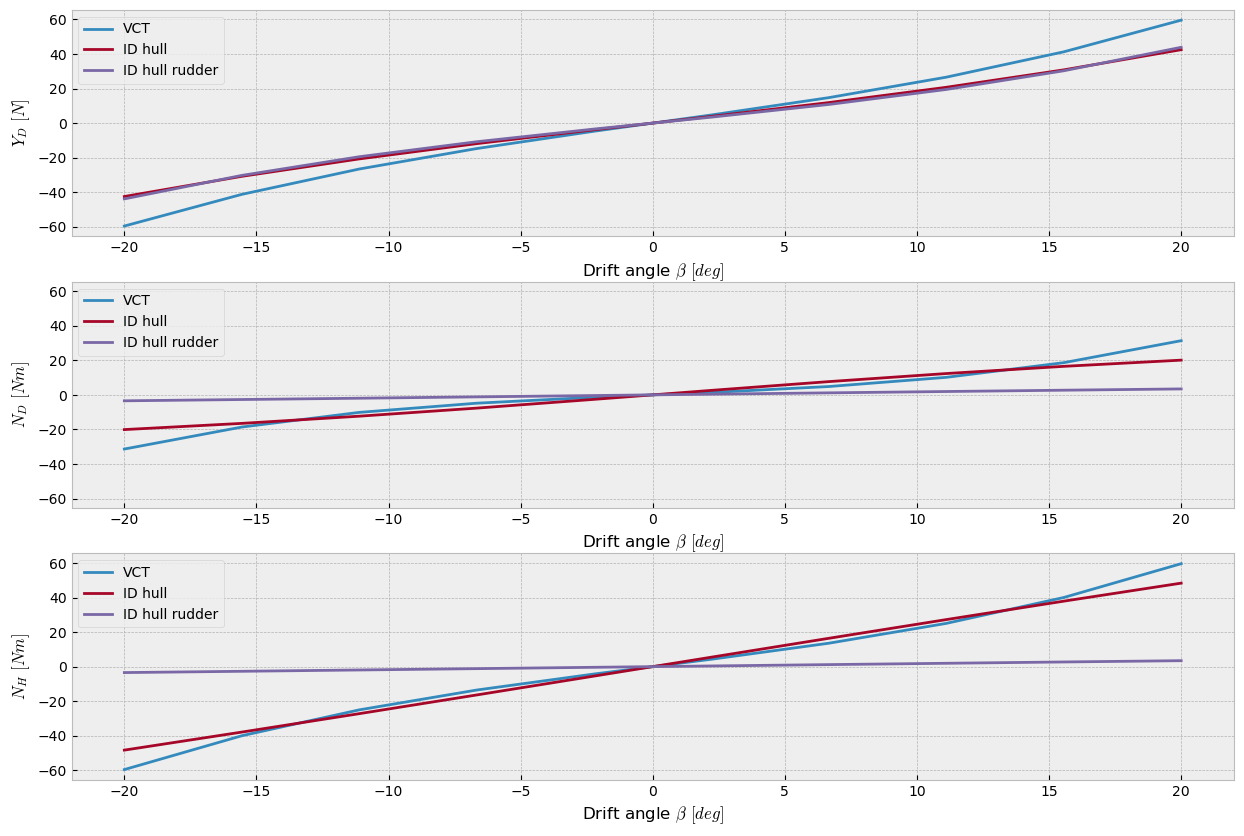

In [10]:
fig,axes=plt.subplots(nrows=3)

ylims={}
keys = ['Y_D','N_D','N_H']
units = ['N','Nm','Nm']
for ax,y,unit in zip(axes,keys,units):

    for name,df in dataframes.items():
        df['beta_deg'] = np.rad2deg(df['beta'])
        df.plot(x='beta_deg', y=y, label=name, ax=ax)
    ax.set_xlabel(r'Drift angle $\beta$ $[deg]$')
    ax.set_ylabel(fr'${y}$ $[{unit}]$')
    
    if not unit in ylims:
        ylims[unit] = list(ax.get_ylim())
    else:
        ylims_ = ylims[unit]
        new_ylims = ax.get_ylim()
        if new_ylims[0] < ylims_[0]:
            ylims_[0] = new_ylims[0]
        
        if new_ylims[1] > ylims_[1]:
            ylims_[1] = new_ylims[1]
        

for ax,unit in zip(axes,units):
    ax.set_ylim(ylims[unit])    
    

In [11]:
#optimization_result = optimize_delta.fit(model=model, data=data)

In [12]:
#optimization_result

In [13]:
dataframes_optimized={}
for name, model_ in models.items():
    
    data_optimized = data.copy()
    optimization_result = optimize_delta.fit(model=model_, data=data_optimized)
    data_optimized['delta'] = optimization_result.x
    dataframes_optimized[name] = predict(model=model_, data=data_optimized)
    #dataframes_optimized[name]['delta'] = data_optimized['delta']

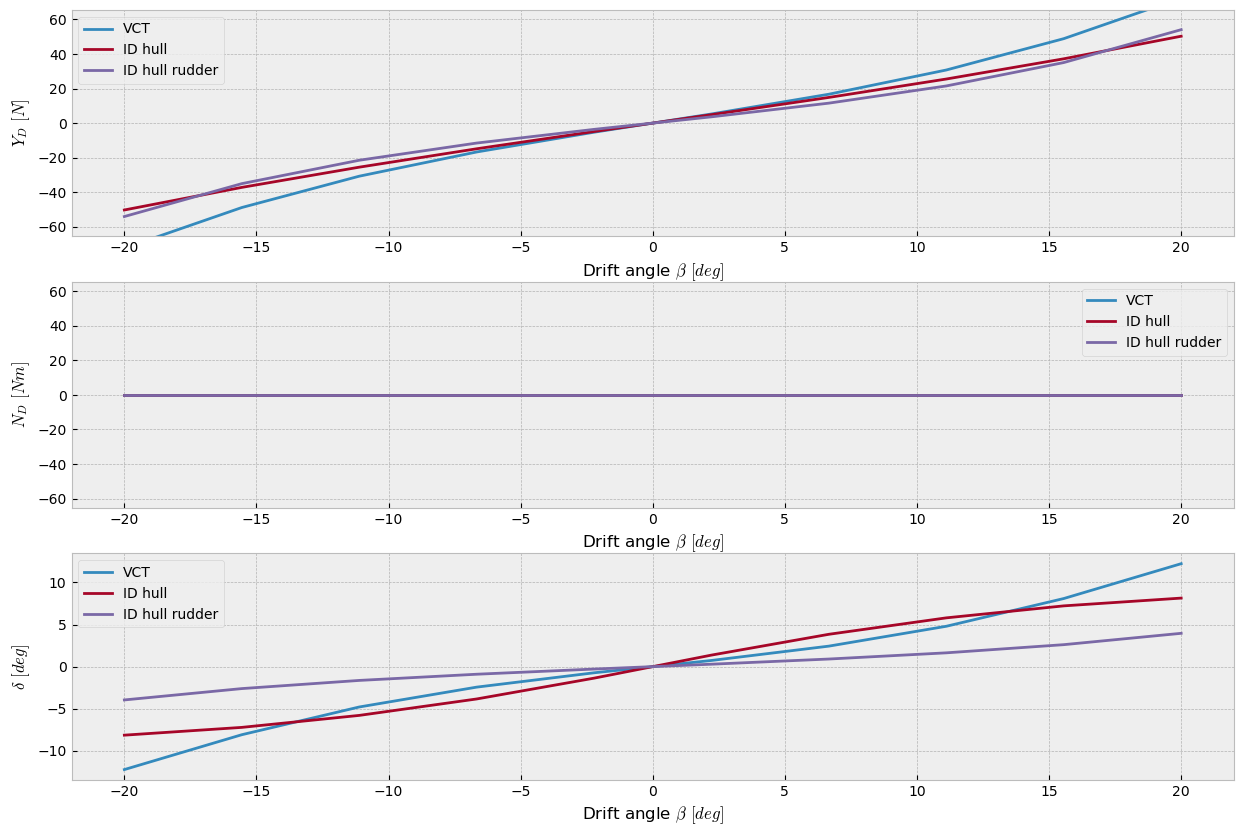

In [14]:
fig,axes=plt.subplots(nrows=3)

ylabels={
'delta_deg':r"$\delta$"
}

for ax,y,unit in zip(axes,['Y_D','N_D','delta_deg'],['N','Nm','deg']):

    for name,df in dataframes_optimized.items():
        df['beta_deg'] = np.rad2deg(df['beta'])
        df['delta_deg'] = np.rad2deg(df['delta'])
        
        df.plot(x='beta_deg', y=y, label=name, ax=ax)
    ax.set_xlabel(r'Drift angle $\beta$ $[deg]$')
    ylabel= ylabels.get(y,fr'${y}$')
    ax.set_ylabel(fr'{ylabel} $[{unit}]$')
    if unit in ylims:
        ax.set_ylim(ylims[unit])